<a href="https://colab.research.google.com/github/spribylova/Python_Hotels/blob/main/hotel_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!mkdir ~/.kaggle

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [43]:
data = pd.read_csv("Hotel_Reviews.csv")
print(data.head())

                  address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province          reviews.date  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   

      reviews.dateAdded  reviews.doRecommend  reviews.id  reviews.rating  \
0  2016-10-24T00:00:25Z                 

In [ ]:
# get the unique countries in the file
data["country"].unique()

array(['US'], dtype=object)

In [ ]:
# get the unique hotel names in the file 
data["name"].unique()

In [ ]:
data["reviews.rating"].unique()

array([ 4. ,  5. ,  3. ,  1. ,  2. ,  0. ,  4.1,  nan,  4.9,  4.8,  3.4,
        2.4,  3.1,  3.2,  3.3,  9.6, 10. ,  8.3,  8.8,  9.2,  7.5,  7.9,
        7.1,  3.8,  5.8,  6.7,  6.3,  4.2,  4.5,  3.9,  1.3,  4.3,  4.7,
        2.8,  4.4,  1.5,  4.6,  3.7,  5.4,  2.5,  6. ,  2.9,  7. ,  9.5])

In [ ]:
# fill the null reviews of the Hotels with 0
data['reviews.rating']=data['reviews.rating'].fillna(0)

In [ ]:
# create a range of 5 maximum review numbers
for i in range(0,len(data)):
   if(data['reviews.rating'].loc[i] > 5):
       temp = data['reviews.rating'].loc[i]
       newtemp = (temp/10)*5
       data.at[i,'reviews.rating'] = newtemp

In [ ]:
ratings = data["reviews.rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
ratings

5.00    12772
4.00     9755
3.00     5709
1.00     3068
2.00     2979
0.00     1199
4.80       78
4.60       56
4.40       30
4.30       26
4.15       25
3.75       24
3.95       24
4.20       22
3.40       17
4.10       14
3.15       14
4.50       13
3.55       13
3.35       12
2.70        9
3.10        7
2.90        7
4.70        6
3.30        6
4.90        6
2.40        4
3.80        3
2.50        3
3.20        2
3.90        2
3.70        2
1.30        1
2.80        1
1.50        1
3.50        1
4.75        1
Name: reviews.rating, dtype: int64

In [ ]:
# round decimal places in rating
ratings=data['reviews.rating'].round(0).value_counts()

In [ ]:
# create indexes from rating value and counts
numbers = ratings.index
quantity = ratings.values

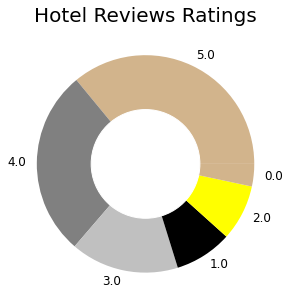

In [ ]:
# assign color to each rating and revise the chart to see the share of rating values 
custom_colors = ["tan", "grey", 'silver', "black", "yellow"]
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Hotel Reviews Ratings", fontsize=20)
plt.show()

In [6]:
# Sentiment analysis - analyzer, transformers, textblob, ...

In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
pip install -q transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
rt = data["reviews.text"]
rt

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
pip install TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# install bs libraries to get the information, you can use selenium or scrapy as well
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv

In [22]:
# extract the HTML content and create an url object
url = ('https://www.tripadvisor.in/Hotels-g28932-Hawaii-Hotels.html')

In [23]:
user_agent = ({'User-Agent':
			'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
			AppleWebKit/537.36 (KHTML, like Gecko) \
			Chrome/90.0.4430.212 Safari/537.36',
			'Accept-Language': 'en-US, en;q=0.5'})

def get_page_contents(url):
    page = requests.get(url, headers = user_agent)
    return BeautifulSoup(page.text, 'html.parser')

In [45]:
soup = get_page_contents(url)

# Find and extract the data elements.
hotels = []
for name in soup.findAll('div',{'class':'listing_title'}):
    hotels.append(name.text.strip())

ratings = []
for rating in soup.findAll('a',{'class':'ui_bubble_rating'}):
    ratings.append(rating['alt'])  

reviews = []
for review in soup.findAll('a',{'class':'review_count'}):
    reviews.append(review.text.strip())

prices = []
for p in soup.findAll('div',{'class':'price-wrap'}):
    prices.append(p.text.replace('₹','').strip())  

In [46]:
# save column names into dictionary
dict = {'Hotel Names':hotels,'Ratings':ratings,'Number of Reviews':reviews,'Prices':prices}

# create the dataframe
information = pd.DataFrame.from_dict(dict)
information.head(10)

# convert dataframe to CSV file
information.to_csv('hotels.csv', index=False, header=True)

In [47]:
# get text reviews using beautiful soup scraping

In [48]:
from bs4 import BeautifulSoup
import re
import requests
import pandas as pd

headers = {'User-Agent':
               'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.yelp.com/biz/fairmont-san-francisco-san-francisco?sort_by=rating_desc"
page_num =0
session = requests.Session()
review_comments = []
while True:
    pageTree = session.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    posts = pageSoup.select('p[lang="en"]')
    for post in posts:
        comments = post.get_text().replace('\n', '').strip()
        #print(comments)
        review_comments.append(comments)

    if pageSoup.find("span", text=re.compile("Next")):
     page = "https://www.yelp.com/biz/fairmont-san-francisco-san-francisco?start={}&sort_by=rating_desc".format(page_num)
     page_num += 20
    else:
      break

df = pd.DataFrame({"Review_Comments": review_comments})
print(df)
df.to_csv('filename.csv')

Empty DataFrame
Columns: [Review_Comments]
Index: []


In [44]:
df = pd.read_csv('filename.csv')

print(df.to_string()) 

Empty DataFrame
Columns: [Unnamed: 0, Review_Comments]
Index: []


In [49]:
# Install the packages.
!pip install beautifulsoup4 requests pandas
# Import the required libraries.
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
names = []
for links in soup.find_all('div', class_='name'):
     name = links.get_text().strip()
     names.append(name)

In [51]:
# Extract the HTML and create a BeautifulSoup object.
url = 'https://www.metacritic.com/game/switch/super-mario-3d-world-+-bowsers-fury/user-reviews'

user_agent = {'User-agent': 'Mozilla/5.0'}

def get_page_contents(url):
    page = requests.get(url, headers = user_agent)
    return BeautifulSoup(page.text, 'html.parser')

soup = get_page_contents(url)

In [52]:
names = []
for links in soup.find_all('div', class_='name'):
     name = links.get_text().strip()
     names.append(name)
dates = []
for links in soup.find_all('div', class_='date'):
     date = links.get_text()
     dates.append(date)
ratings = []   
for links in soup.find_all('div', class_='metascore_w user medium game positive indiv'):
     score = links.get_text()
     ratings.append(score)
reviews = []   
for links in soup.find_all('span', class_='blurb blurb_expanded'):
     review = links.get_text()
     reviews.append(review)

for links in soup.find_all('span', class_='blurb blurb_collapsed'):
     review = links.get_text()
     reviews.append(review)

In [53]:
# Create the dictionary.
games_dict = {'Name': names, 'Date': dates, 'Rating': ratings, 'Review': reviews}

In [55]:
# Print the lengths of each list.  
print(len(names), len(dates), len(ratings), len(reviews))

100 103 35 76


In [56]:
# Create the data frame.
game = pd.DataFrame.from_dict(games_dict, orient='index')
games = game.transpose()

In [57]:
games.head(4)

Name          Date Rating  \
0      nahobino5_  Jun 27, 2021      8   
1    BlueNightDev  Feb 17, 2021      9   
2  SuperkenGaming  Feb 18, 2021      9   
3            anyu  Feb 14, 2021      9   

                                              Review  
0  A luxurious and high-caliber platform game tha...  
1  I, like many others, didn't like 3d World when...  
2  I didn't had a wii U so I had never experience...  
3  This is a great bundle from Nintendo. Not only...

In [58]:
games.to_csv('reviews.csv', index=False, header=True)
reviews = pd.read_csv('reviews.csv', lineterminator='\n')

In [59]:
print(reviews)

               Name          Date  Rating  \
0        nahobino5_  Jun 27, 2021     8.0   
1      BlueNightDev  Feb 17, 2021     9.0   
2    SuperkenGaming  Feb 18, 2021     9.0   
3              anyu  Feb 14, 2021     9.0   
4        JordiMesen  Feb 14, 2021     9.0   
..              ...           ...     ...   
98        mbestvina  Feb 16, 2021     NaN   
99          EdwardG  Mar  4, 2021     NaN   
100             NaN  Oct 22, 2021     NaN   
101             NaN  Oct 12, 2021     NaN   
102             NaN  May 17, 2021     NaN   

                                                Review  
0    A luxurious and high-caliber platform game tha...  
1    I, like many others, didn't like 3d World when...  
2    I didn't had a wii U so I had never experience...  
3    This is a great bundle from Nintendo. Not only...  
4    This is an Amazing game! I absolutely love eac...  
..                                                 ...  
98                                                 NaN  
99 